# **SPARKS FOUNDATION**

# **Task 1- Prediction using Supervised MACHINE LEARNING**


##  By Arvind Nagarajan, Loyola College, February 2021**
In this particular task we have to predict the percentage of marks scored by the student depending the number of hours they studied.In this task only two variables are involved. It is a simple linear regression model.We also wish to predict score for student who studies for "9.25" hours in a day.

https://www.linkedin.com/in/arvind-n-514b91204/ : Linkedin Address



In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [41]:
#reading data
data = 'http://bit.ly/w-data'
ds = pd.read_csv(data)
ds.head()   #this displays first five rows and columns of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [42]:
ds.tail() # this displays the last five rows 

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [43]:
# We will check if there any missing/null values in the Dataset
ds.isnull == True

False

***There is NO MISSING/NULL Value in This DataSet So we can do visualization  of data***

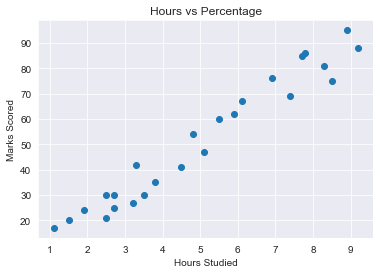

In [44]:
sns.set_style('darkgrid')
plt.scatter(ds['Hours'],ds['Scores'])
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Scored")
plt.grid(True)
plt.show()

** There is obviously very strong correlation between hours and marks scored. Let us plot regression line for the same.**


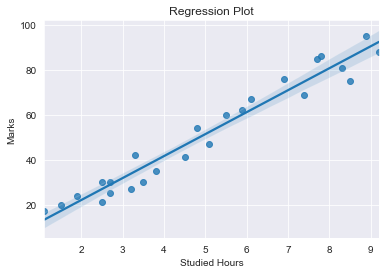

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [45]:
sns.regplot(x= ds['Hours'], y= ds['Scores'])
plt.title('Regression Plot')
plt.ylabel('Marks')
plt.xlabel('Studied Hours')
plt.show()
print(ds.corr())

**It is very obvious that the variables are positively correlated.**

## **We create Training Model**

### **1) Splitting Data**

In [46]:
X = ds.iloc[:, :-1].values  
y = ds.iloc[:, 1].values
#splitting data 
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### **2) Fitting the Data into the model**

In [47]:
regression = LinearRegression()
regression.fit(train_X, train_y)


LinearRegression()

## **Predicting Percentage of Marks**

In [48]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## **Let us compare the Predicted to Actual values/marks**

In [49]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## **Visually Comparing the Predicted Marks with the Actual Marks**

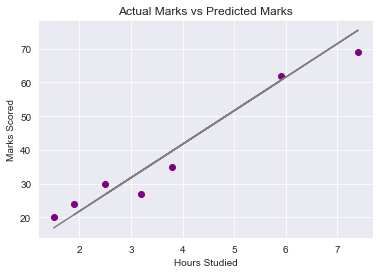

In [50]:
plt.scatter(x=val_X, y=val_y, color='Purple')
plt.plot(val_X, pred_y, color='Grey')
plt.title('Actual Marks vs Predicted Marks')
plt.ylabel('Marks Scored')
plt.xlabel('Hours Studied')
plt.show()

## **Let us evaluate the model**

In [51]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


# **Let us find marks, if hours studied is 9.25**

In [52]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],4)))

Score = 93.8927


## **According to our model if the student studies for 9.25 hours a day he will score            93.8927 or 94 % in his exams.**